# A Brief Introduction to Convolution in LTI Discrete time systems.

Author: Ed Ang

Date: 27 Feb 2020

In the continuous-time domain, the convolution between 2 signals that are characterised by functions, $f(t)$ and $g(t)$, is defined as follows. 

\begin{equation}
(f \ast g)(t) = \int_{-\infty}^{\infty} f(\tau)g(t-\tau)d\tau 
\end{equation}

In the discrete time domain, the convolution between 2 signals that are characterised by functions, $f(n)$ and $g(n)$ is defined as follows.

\begin{equation}
(f \ast g)[n] = \sum_{k=-\infty}^{\infty} f[k]g[n-k]
\end{equation}

# An example

Let's assume that we have 2 signals $s_1$ and $s_2$, which are defined as follows.

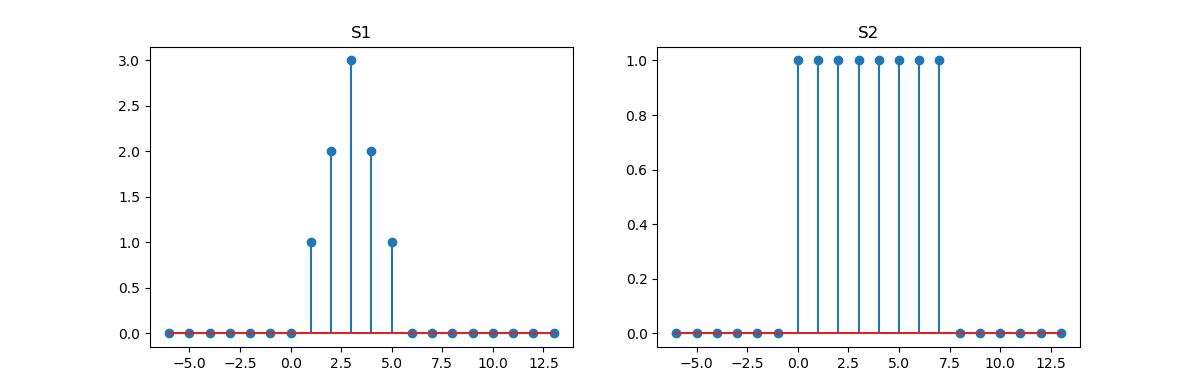

In [1]:
#include "commonHeader.hpp"

int x[20] = {-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13};     // Horizontal axis for the signal.
int s1[20] = {0,0,0,0,0,0,0,1,2,3,2,1,0,0,0,0,0,0,0,0};              // Signal s1.
int s2[20] = {0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0};              // Signal s2.
int len_signal = 20;

s1_ds = ds.init_ds_1d(&s1[0], x[0], len_signal);
s2_ds = ds.init_ds_1d(&s2[0], x[0], len_signal);

//Assignment of signals to an array.
signal_labels[0] = "S1";
signal_labels[1] = "S2";
multi_dim_signals[0] = s1_ds;
multi_dim_signals[1] = s2_ds;

displayer.plot_signals(signal_labels, multi_dim_signals);

In [2]:
// Create an variable to hold the results of convolution.
convolved = ds.init_ds_1d(s1_ds.time[0], s1_ds.length);

Below is a direct implementation of the expression shown above. You should be able to see the similarity between the expression and the body of the loop, which is composed of a sequence of multiply and add/accumulate (MAC) operations. The MAC result is held in the variable $\it{element}$.

In [3]:
void convolution() {
    
    for(int i=0; i<s1_ds.length; i++) {
        int element = 0;
        
        for(int j=s1_ds.time[0]; j<=s1_ds.time[s1_ds.length-1]; j++) {
            element += ds.read_ds(s2_ds, j)*ds.read_ds(s1_ds, i-j);
        }
        
        ds.write_ds(convolved, i, element);
    }
    
}

The convolution of the 2 signals, $s_1$ and $s_2$, are illustrated in the chart below.

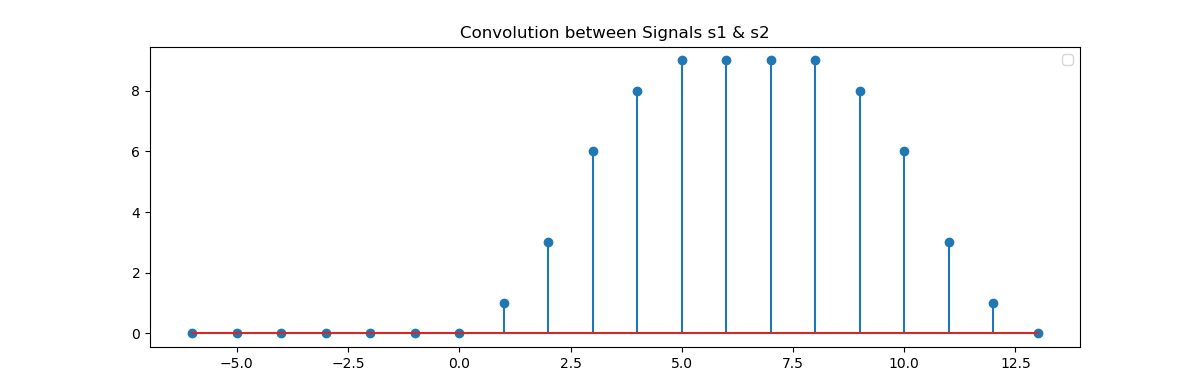

In [4]:
// Run the covolution kernel.
convolution();

// Plot the convolved signal.
displayer.plot_signal("Convolution between Signals s1 & s2", convolved);

An intuitive way of understanding the convolution between 2 signals, $s_1$ and $s_2$, is by flipping the signal $s_1$ about the y-axis, and shifting the resulting signal across signal $s_2$. At each new position, after a shift, the signals are multiplied and subsequently added together to obtain the convolution sum at a particular location (index $k$ in the above expression). 

Click the button below for an animation depicting convolution.

In [5]:
void trigger_convolution()
{
    auto g = xout.guard();
    displayer.demo_convolution("LINEAR CONVOLUTION IN ACTION", multi_dim_signals);
}

In [6]:
button.description = "I AM A BUTTON!";
button.button_style = "success";
button.on_click(trigger_convolution);
button.layout().width = "100%";
button.layout().height = "100%";
button.display();
xout

A Jupyter widget

A Jupyter widget

# A Short Lecture

This short video discusses convolution within the context of a Linear Time Invariant (LTI) system, as well as its commutative property. 

In [7]:
displayer.show_video();

This video is reproduced with permission from MIT. The original source may be found [here](https://ocw.mit.edu/resources/res-6-008-digital-signal-processing-spring-2011/).